## Python Basic

In [0]:
a = 3
b = 2
a + b

5

In [0]:
a * 10

30

## Check GPU Version

In [0]:
! nvidia-smi

Sat Apr 25 03:05:43 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## Data Science Project In Practice

### Data Collection

In [0]:
import pandas
dfs = pandas.read_html('https://rate.bot.com.tw/xrt/quote/l6m/JPY')

### Data Cleansing

In [0]:
df = dfs[0].iloc[:,0:6]

In [0]:
df.columns = ['掛牌日期', '幣別', '現金匯率買入','現金匯率賣出', '即期匯率買入','即期匯率賣出']

In [0]:
df.head()

,掛牌日期,幣別,現金匯率買入,現金匯率賣出,即期匯率買入,即期匯率賣出
0,2020/04/24,日圓 (JPY),0.2697,0.2825,0.2770,0.2810
1,2020/04/23,日圓 (JPY),0.2701,0.2829,0.2774,0.2814
2,2020/04/22,日圓 (JPY),0.2700,0.2828,0.2773,0.2813
3,2020/04/21,日圓 (JPY),0.2706,0.2834,0.2779,0.2819
4,2020/04/20,日圓 (JPY),0.2696,0.2824,0.2769,0.2809


In [0]:
df['掛牌日期'] = pandas.to_datetime(df['掛牌日期'], format = '%Y/%m/%d')
df.set_index(df['掛牌日期'], inplace=True)

In [0]:
df.head()

,掛牌日期,幣別,現金匯率買入,現金匯率賣出,即期匯率買入,即期匯率賣出
掛牌日期,,,,,,
2020-04-24,2020-04-24,日圓 (JPY),0.2697,0.2825,0.2770,0.2810
2020-04-23,2020-04-23,日圓 (JPY),0.2701,0.2829,0.2774,0.2814
2020-04-22,2020-04-22,日圓 (JPY),0.2700,0.2828,0.2773,0.2813
2020-04-21,2020-04-21,日圓 (JPY),0.2706,0.2834,0.2779,0.2819
2020-04-20,2020-04-20,日圓 (JPY),0.2696,0.2824,0.2769,0.2809


In [0]:
df.sort_index(inplace=True)

### Data Visualization

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25499 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29260 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 25499 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 29260 missing from current font.
  font.set_te

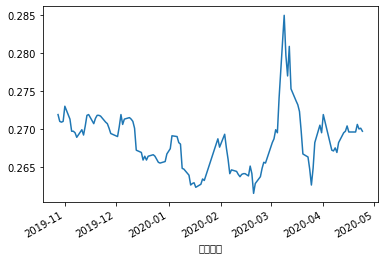

In [0]:
df['現金匯率買入'].plot(kind = 'line')

### Data Analysis

In [0]:
df['ma30'] = df['現金匯率買入'].rolling(window = 30).mean()

In [0]:
!wget -O /usr/share/fonts/truetype/liberation/simhei.ttf https://raw.githubusercontent.com/StellarCN/scp_zh/master/fonts/SimHei.ttf

--2020-04-25 03:24:46--  https://raw.githubusercontent.com/StellarCN/scp_zh/master/fonts/SimHei.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9751960 (9.3M) [application/octet-stream]
Saving to: ‘/usr/share/fonts/truetype/liberation/simhei.ttf’

/usr/share/fonts/tr 100%[===================>]   9.30M  --.-KB/s    in 0.05s   

2020-04-25 03:24:47 (174 MB/s) - ‘/usr/share/fonts/truetype/liberation/simhei.ttf’ saved [9751960/9751960]



In [0]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = '/usr/share/fonts/truetype/liberation/simhei.ttf'
zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')

findfont: Font family ['/usr/share/fonts/truetype/liberation/simhei.ttf'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25499 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29260 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 25499 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-pac

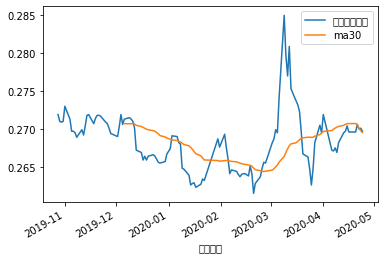

In [0]:
df[['現金匯率買入', 'ma30']].plot(kind = 'line')

## Numeric

In [0]:
3 + 2 * 8

19

In [0]:
a = 3
b = 2
a + b

5

In [0]:
a - b

1

In [0]:
type(a)

int

In [0]:
c = 1.5
d = 2.5

In [0]:
c + d

4.0

In [0]:
c - d

-1.0

In [0]:
type(c)

float

In [0]:
a = '2'
type(a)

str

In [0]:
int(a)

2

In [0]:
type(int(a))

int

In [0]:
float(int(a))

2.0

In [0]:
type(float(int(a)))

float

In [0]:
float('3.2')

3.2

In [0]:
a = 5
a + a

10

In [0]:
a = 10
a

10

In [0]:
a = a + a
a

20

In [0]:
price = 49.99
exchange_rate = 30.31

In [0]:
ntd_price = price * exchange_rate

In [0]:
ntd_price

1515.1969

## String

In [0]:
'this is a string'

'this is a string'

In [0]:
"this is also a string"

'this is also a string'

In [0]:
'寶寶心理苦，但寶寶不說'

'寶寶心理苦，但寶寶不說'

In [0]:
'i wanna know 不說'

'i wanna know 不說'

In [0]:
'this is a string'
"this is also a string"

'this is also a string'

In [0]:
print('this is a string')
print("this is also a string")

this is a string
this is also a string


In [0]:
print('Here is a new line \n and here is the second line')

Here is a new line 
 and here is the second line


In [0]:
print("1 2 3\n100 200 300")

1 2 3
100 200 300


In [0]:
print("1\t2\t3\n100\t200\t300")

1	2	3
100	200	300


In [0]:
a = 'this is a loooooooooooooooooooooooooooooooooooooooooooooooong line'
a

'this is a loooooooooooooooooooooooooooooooooooooooooooooooong line'

In [0]:
a = 'this is a looooooooooooooooooooooooo\
ooooooooooooooooooooooong line'
a

'this is a loooooooooooooooooooooooooooooooooooooooooooooooong line'

In [0]:
'''Here is a new line
and here is the second line'''

'Here is a new line\nand here is the second line'

In [0]:
print('''Here is a new line
and here is the second line''')

Here is a new line
and here is the second line


In [0]:
s = 'Hello'

In [0]:
s[0]

'H'

In [0]:
len(s)

5

In [0]:
s[len(s) -1]

'o'

In [0]:
s[-1]

'o'

In [0]:
s

'Hello'

In [0]:
# begin:end
s[:]

'Hello'

In [0]:
s[1:]

'ello'

In [0]:
# get charater from 1, before 4
# for(i = 0, i < 4; i++ )
s[1:4]

'ell'

In [0]:
s[:3]

'Hel'

In [0]:
# begin:end:step
s[::]

'Hello'

In [0]:
s[::2]

'Hlo'

In [0]:
s[1::2]

'el'

In [0]:
# for(i=len(s) -1 ; i> 0 ; i--)
s[::-1]

'olleH'

In [0]:
s[::-2]

'olH'

In [0]:
s = 'madamimadam'
s[::-1]

'madamimadam'

In [0]:
s == s[::-1]

True

In [0]:
s[0]

'm'

In [0]:
s[0] = 'x'

TypeError: ignored

In [0]:
s = 'hello '
s + 'world'

'hello world'

In [0]:
letter = '?'
letter * 10

'??????????'

In [0]:
letter = 'i am sorry! '
letter * 10

'i am sorry! i am sorry! i am sorry! i am sorry! i am sorry! i am sorry! i am sorry! i am sorry! i am sorry! i am sorry! '

In [0]:
print(dir(s))

['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mod__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmod__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'capitalize', 'casefold', 'center', 'count', 'encode', 'endswith', 'expandtabs', 'find', 'format', 'format_map', 'index', 'isalnum', 'isalpha', 'isdecimal', 'isdigit', 'isidentifier', 'islower', 'isnumeric', 'isprintable', 'isspace', 'istitle', 'isupper', 'join', 'ljust', 'lower', 'lstrip', 'maketrans', 'partition', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'rstrip', 'split', 'splitlines', 'startswith', 'strip', 'swapcase', 'title', 'translate', 'upper', 'zfill']


In [0]:
s

'hello '

In [0]:
s.upper()

'HELLO '

In [0]:
s.lower()

'hello '

In [0]:
help(s.upper)

Help on built-in function upper:

upper(...) method of builtins.str instance
    S.upper() -> str
    
    Return a copy of S converted to uppercase.



In [0]:
?s.upper

In [0]:
s = 'hello world'
s.split()

['hello', 'world']

In [0]:
len('hello world')

11

## Practice

In [0]:
s = '[問卦] 大家聽過點餐時問過最奇葩的問題是什麼?'

In [3]:
s[5:]

'大家聽過點餐時問過最奇葩的問題是什麼?'

In [5]:
s.split()[1]

'大家聽過點餐時問過最奇葩的問題是什麼?'

## Python List

In [6]:
a = []
type(a)

list

In [0]:
a = [1,2,3]

In [0]:
a =['my string', 1, 2, 3, 1.234]

In [10]:
a[1] + 100

101

In [12]:
a[0].upper()

'MY STRING'

In [13]:
len(a)

5

In [0]:
a  = [5,6,7, 's']

In [15]:
a[0]

5

In [16]:
a[-1]

's'

In [18]:
a[2:4]

[7, 's']

In [19]:
a[2:100]

[7, 's']

In [20]:
a[::2]

[5, 7]

In [21]:
a[::-1]

['s', 7, 6, 5]

In [22]:
len(a)

4

In [0]:
a = [5,6,7,8]

In [24]:
a.pop()

8

In [25]:
a

[5, 6, 7]

In [0]:
a.append(2)

In [27]:
a

[5, 6, 7, 2]

In [0]:
a.sort()

In [29]:
a

[2, 5, 6, 7]

In [0]:
a.reverse()

In [31]:
a

[7, 6, 5, 2]

In [32]:
list('a')

['a']

In [0]:
hello = list('hello world')

In [34]:
hello

['h', 'e', 'l', 'l', 'o', ' ', 'w', 'o', 'r', 'l', 'd']

In [35]:
'a' in hello

False

In [36]:
'h' in hello

True

In [37]:
a = '日本東京新聞引述消息人士指出，北韓領導人金正恩因新冠病毒相關原因，從平壤搬到元山市一棟別墅辦公，這可能是金正恩最近不見人影的原因。'
'川普' in a

False

In [38]:
a = 3
b = a
b

3

In [0]:
b = 5

In [40]:
b

5

In [41]:
a

3

In [0]:
a = [1, 2, 3]
b = a


In [0]:
a[1] = 200

In [44]:
a

[1, 200, 3]

In [45]:
b

[1, 200, 3]

In [0]:
a = [1,2,3]
b = a.copy()

In [0]:
a[1] = 2000

In [48]:
a

[1, 2000, 3]

In [49]:
b

[1, 2, 3]

## Dictionary

In [0]:
dic = {'a':100, 'b':"yes", 'c':0.98}

In [51]:
dic.keys()

dict_keys(['a', 'b', 'c'])

In [52]:
dic.values()

dict_values([100, 'yes', 0.98])

In [53]:
dic['a']

100

In [54]:
dic['d']

KeyError: ignored

In [55]:
dic.get('a')

100

In [0]:
dic.get('d')

In [0]:
?dic.get

In [58]:
print(dic.get('d'))

None


In [59]:
dic.get('d', 'DEFAULT')

'DEFAULT'

In [60]:
dic.get('a', 'DEFAULT')

100

In [0]:
dic['d'] = 'new'

In [62]:
dic

{'a': 100, 'b': 'yes', 'c': 0.98, 'd': 'new'}

In [63]:
dic['d'] = 'newnew'
dic

{'a': 100, 'b': 'yes', 'c': 0.98, 'd': 'newnew'}

In [0]:
dic2 = {'d':234, 'e':345}
dic.update(dic2)

In [65]:
dic

{'a': 100, 'b': 'yes', 'c': 0.98, 'd': 234, 'e': 345}

### 小任務

我們希望建立一個對話機器人, 機器人裡面內建一個資料問答資料庫, 資料庫的問題跟答案如下所示:

- 問題:我要保保險 答案: 以下是我們推薦的險總類
- 問題:我要貸款 答案: 以下是我們推薦的貸款總類
- 問題:我要查餘額 答案: 以下是您的銀行存款餘額


希望你能用這個問答資料庫建立成一個Python 字典, 當使用者輸入問題時, 可以根據問答資料庫回答答案, 但是如果問題不在資料庫之中，請答：我現在還不聰明，等我變聰明以後再回答你

In [0]:
qa = {'我要保保險':'以下是我們推薦的險總類', 
      '我要貸款':'以下是我們推薦的貸款總類',
      '我要查餘額':'以下是您的銀行存款餘額'}

In [73]:
question = input('請輸入你的問題?')
print(qa.get(question, '我現在還不聰明，等我變聰明以後再回答你'))

請輸入你的問題?早安
我現在還不聰明，等我變聰明以後再回答你


## Tuple

In [0]:
a = {(1,2): 123, ('a','b') : 567}

In [75]:
print(dir(list))

['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


In [76]:
print(dir(tuple))

['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'count', 'index']


In [0]:
t = ('one', 2)

In [78]:
len(t)

2

In [79]:
t[0]

'one'

In [80]:
t[-1]

2

In [81]:
t.index('one')

0

In [82]:
t.count('one')

1

In [83]:
t[1] = 3

TypeError: ignored

In [84]:
t.append('nope')

AttributeError: ignored

In [0]:
a = 1
b = 2

In [0]:
a,b = 1,2

In [87]:
a

1

In [88]:
b

2

In [89]:
a,b

(1, 2)

## Set

In [90]:
l1 = [1,1,1,2,2,1,3,3]
set(l1)

{1, 2, 3}

In [91]:
l2 = [3,3,3,4,5]
set(l2)

{3, 4, 5}

In [92]:
set(l1) & set(l2)

{3}

In [93]:
set(l1) | set(l2)

{1, 2, 3, 4, 5}

In [94]:
set(l1) - set(l2)

{1, 2}

## Control Flow

In [0]:
# if(a > 3){
#    System.out.println(a);
# }
#

In [101]:
a = 5
if a > 3:
                                                              print(a)

5


In [102]:
if True:
  print('It was true!')

It was true!


In [103]:
x = False
if x:
  print('x was True!')
else:
  print('I will be printed in any case where x is not true')

I will be printed in any case where x is not true


In [106]:
deposit= 55000
if deposit> 30000:
  print('Buy iPhone')
elif deposit> 20000:
  print('Buy Oppo')
else:
  print('Save More Money')

Buy iPhone


In [107]:
l = [1,2,3,4,5,6,7,8,9,10]
for num in l:
  print(num)

1
2
3
4
5
6
7
8
9
10


In [108]:
l = [1,2,3,4,5,6,7,8,9,10]
for qoo in l:
  print(qoo)

1
2
3
4
5
6
7
8
9
10


In [109]:
# range(起點,終點)
for num in range(1,11):
  print(num)

1
2
3
4
5
6
7
8
9
10


In [111]:
list_sum = 0
for num in range(1,101):
  list_sum = list_sum + num
print(list_sum)

5050


In [112]:
list_sum = 0
for num in range(1,101):
  list_sum += num
print(list_sum)

5050


In [115]:
sum = 0
for num in range(1,101):
  sum += num
print(sum)

5050


In [0]:
del sum

In [118]:
sum(range(1,101))

5050

In [119]:
for letter in 'This is a string':
  print(letter)


T
h
i
s
 
i
s
 
a
 
s
t
r
i
n
g


In [120]:
tup = (1,2,3,4,5)
for t in tup:
  print(t)

1
2
3
4
5


In [0]:
l = [(2,4),(6,8),(10,12)]

In [122]:
for tup in l:
  print(tup)

(2, 4)
(6, 8)
(10, 12)


In [123]:
for tup in l:
  t1 = tup[0]
  t2 = tup[1]
  print(t1,t2)

2 4
6 8
10 12


In [124]:
for t1,t2 in l:
  print(t1,t2)

2 4
6 8
10 12


In [125]:
d = {'k1':1,'k2':2,'k3':3}
for item in d:
  print(item)

k1
k2
k3


In [126]:
d = {'k1':1,'k2':2,'k3':3}
for item in d:
  print(item, d.get(item))

k1 1
k2 2
k3 3


In [127]:
d.items()

dict_items([('k1', 1), ('k2', 2), ('k3', 3)])

In [128]:
for k,v in d.items():
  print(k,v)

k1 1
k2 2
k3 3


In [129]:
x = 0
while x < 10:
  print('x is currently: ',x)
  print('x is still less than 10, adding 1 to x')
  x+=1


x is currently:  0
x is still less than 10, adding 1 to x
x is currently:  1
x is still less than 10, adding 1 to x
x is currently:  2
x is still less than 10, adding 1 to x
x is currently:  3
x is still less than 10, adding 1 to x
x is currently:  4
x is still less than 10, adding 1 to x
x is currently:  5
x is still less than 10, adding 1 to x
x is currently:  6
x is still less than 10, adding 1 to x
x is currently:  7
x is still less than 10, adding 1 to x
x is currently:  8
x is still less than 10, adding 1 to x
x is currently:  9
x is still less than 10, adding 1 to x


In [130]:
x = 0
while x < 10:
  print('x is currently: ',x)
  print('x is still less than 10, adding 1 to x')
  x+=1
else:
  print('All Done!')

x is currently:  0
x is still less than 10, adding 1 to x
x is currently:  1
x is still less than 10, adding 1 to x
x is currently:  2
x is still less than 10, adding 1 to x
x is currently:  3
x is still less than 10, adding 1 to x
x is currently:  4
x is still less than 10, adding 1 to x
x is currently:  5
x is still less than 10, adding 1 to x
x is currently:  6
x is still less than 10, adding 1 to x
x is currently:  7
x is still less than 10, adding 1 to x
x is currently:  8
x is still less than 10, adding 1 to x
x is currently:  9
x is still less than 10, adding 1 to x
All Done!


In [132]:
x = 0
while x < 10:
  print('x is currently: ',x )
  print(' x is still less than 10, adding 1 to x' )
  x+=1
  if x ==3:
    print('x==3')
  else:
    print('continuing...' )
    #continue
    break

x is currently:  0
 x is still less than 10, adding 1 to x
continuing...


In [137]:
x = 0
while x < 10:
  print('x is currently: ',x)
  print(' x is still less than 10, adding 1 to x')
  x+=1
  if x ==3:
    #break # 終止迴圈
    #continue # 回到迴圈的開頭
    pass # 往下繼續執行
    print('Breaking because x==3' )
    #break
  else:
    print('continuing...')
    continue


x is currently:  0
 x is still less than 10, adding 1 to x
continuing...
x is currently:  1
 x is still less than 10, adding 1 to x
continuing...
x is currently:  2
 x is still less than 10, adding 1 to x
Breaking because x==3
x is currently:  3
 x is still less than 10, adding 1 to x
continuing...
x is currently:  4
 x is still less than 10, adding 1 to x
continuing...
x is currently:  5
 x is still less than 10, adding 1 to x
continuing...
x is currently:  6
 x is still less than 10, adding 1 to x
continuing...
x is currently:  7
 x is still less than 10, adding 1 to x
continuing...
x is currently:  8
 x is still less than 10, adding 1 to x
continuing...
x is currently:  9
 x is still less than 10, adding 1 to x
continuing...


In [0]:
#while True:
#  print('Uh Oh infinite Loop!')

### 小任務二

我們希望建立一個對話機器人, 機器人裡面內建一個資料問答資料庫, 資料庫的問題跟答案如下所示:

- 問題:保險 答案: 以下是我們推薦的險總類
- 問題:貸款 答案: 以下是我們推薦的貸款總類
- 問題:存款 答案: 以下是您的銀行存款餘額

希望你能用這個問答資料庫建立成一個Python 字典, 當使用者輸入問題時, 只要問題中有部分關鍵字對到問答資料庫的問題,電腦就予以回答


(加分) 但是如果問題不在資料庫之中，請答：我現在還不聰明，等我變聰明以後再回答你 (for...else)

In [140]:
'保險' in '我要保保險'

True